In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("mail_data.csv")

In [5]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
X = data['Message']
y = data['Category']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()

In [11]:
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
model = MultinomialNB()

In [14]:
model.fit(x_train_vec, y_train)

MultinomialNB()

In [15]:
y_pred = model.predict(x_test_vec)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 99.19%


In [18]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Accuracy: 98.48%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



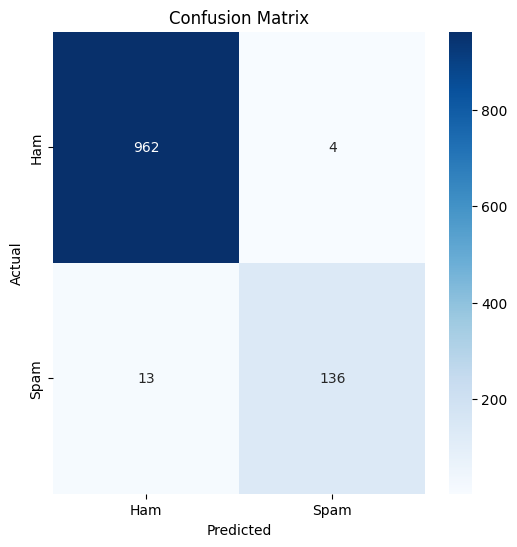

Predictions:
Congratulations! You've won a free cruise. Call now. --> spam
Hi, how are you? --> ham


In [19]:

# Load the dataset
data = pd.read_csv("mail_data.csv")
print(data.head())  # To view the structure of the dataset

# Preprocessing function
def pre_process(message):
    # Remove punctuation and lowercase the text
    message = re.sub(r'[^\w\s]', '', message.lower())
    # Tokenize text
    tokens = nltk.word_tokenize(message)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_text = [word for word in tokens if word not in stop_words]
    return ' '.join(cleaned_text)

# Apply preprocessing to the 'Message' column
data['Message'] = data['Message'].apply(pre_process)

# Convert labels to binary (spam = 1, ham = 0)
data['Category'] = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Define features and labels
X = data['Message']
y = data['Category']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(x_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_vec)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Test the model with new messages
new_messages = [
    "Congratulations! You've won a free cruise. Call now.",
    "Hi, how are you?"
]

# Preprocess and transform new messages
new_messages_processed = [pre_process(msg) for msg in new_messages]
X_new = vectorizer.transform(new_messages_processed)
predictions = model.predict(X_new)

# Print predictions for new messages
print('Predictions:')
for message, prediction in zip(new_messages, predictions):
    label = 'spam' if prediction == 1 else 'ham'
    print(f'{message} --> {label}')


In [27]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import seaborn as sns
import re

In [22]:
df = pd.read_csv('mail_data.csv')

In [23]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [28]:
def pre_process(messages):
    message = re.sub(r'[^\w\s]', '',messages.lower())
    tokens = nltk.word_tokenize(message)
    stop_words=set(stopwords.words('english'))
    cleaned_text = [word for word in tokens if word not in stop_words]
    return ' '.join(cleaned_text)

In [29]:
df['Message'] = df['Message'].apply(pre_process)

In [30]:
df

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [31]:
df['Category'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [32]:
df

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,2nd time tried 2 contact u u 750 pound prize 2...
5568,0,ü b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [33]:
x = df['Message']
y = df['Category']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
vect = CountVectorizer()

In [37]:
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [38]:
clf = MultinomialNB()

In [39]:
clf.fit(x_train_vect , y_train)

MultinomialNB()

In [40]:
y_pred = clf.predict(x_test_vect)

In [41]:
acc = accuracy_score(y_test,y_pred)

In [43]:
print(f'accuracy - {acc*100:.2f} %')

accuracy - 98.48 %


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [46]:
conf_mat = confusion_matrix(y_test,y_pred)

In [47]:
conf_mat

array([[962,   4],
       [ 13, 136]])

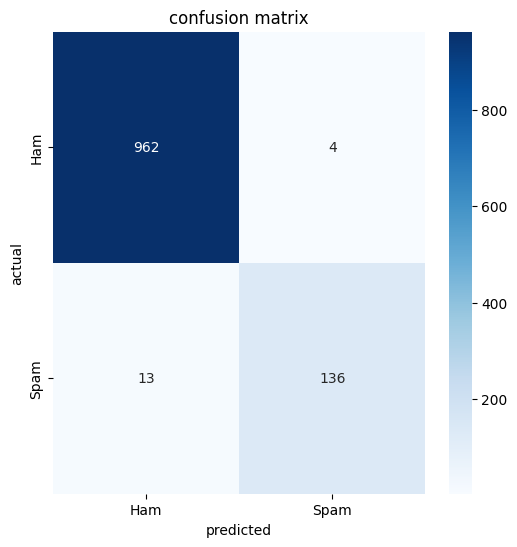

In [48]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat , annot=True , fmt='d' , cmap='Blues' , xticklabels=['Ham' , 'Spam'] , yticklabels = ['Ham' ,'Spam'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

In [50]:
new_messages = [
    "Congratulations!! you've won a free cruise. call now.",
    "Hi ,  how are you?"
]

new_messages_process = [pre_process(msg) for msg in new_messages ]
x_new = vect.transform(new_messages_process)
predictions = clf.predict(x_new)


In [51]:
print('predictions')
for message , pred in zip(new_messages_process,predictions):
    label = 'spam' if pred == 1 else ' ham'
    print(f'{message} --------> {label}')

predictions
congratulations youve free cruise call --------> spam
hi -------->  ham
